<a href="https://colab.research.google.com/github/MahdiNavaei/Forcast-Forex-With-Deep-Learning-Models/blob/main/Forcast-Forex-With-Deep-Learning-Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime,timedelta
import scipy
import pylab
import statsmodels.tsa.stattools as sts

In [ ]:
api_key = 'e61479fbc59d62f40c959bd6021e9df48b79c324'

In [ ]:
end = datetime.now()
start = end - timedelta(days=365*2)
start_date = start.replace(hour=0, minute=0, second=0, microsecond=0)
end_date = end.replace(hour=23, minute=59, second=59, microsecond=999999)


In [ ]:
ticker = 'EURJPY'

In [ ]:
interval = '1hour'

In [ ]:
url = f'https://api.tiingo.com/tiingo/fx/{ticker}/prices?startDate={start_date}&endDate={end_date}&resampleFreq={interval}&token={api_key}'


In [ ]:
response = requests.get(url)

In [ ]:
if response.status_code == 200:
    data = response.json()
    df = pd.json_normalize(data)

    # ذخیره داده ها در یک فایل اکسل
    df.to_excel('stock_data.xlsx', index=False)
    print('Data saved successfully.')
else:
    print("Error receiving data")

In [ ]:
df= pd.DataFrame(df)
df

In [ ]:
df= pd.DataFrame(df)
df['date']=pd.to_datetime(df['date'])
df

KeyError: ignored

In [70]:
df=df['ticker'].drop()

IndexError: ignored

In [45]:
df['date'] = df['date'].dt.strftime('%d-%m-%Y %H:%M:%S')


In [46]:
df.set_index('date',inplace=True)
df

,ticker,open,high,low,close
date,,,,,
26-03-2021 00:00:00,eurjpy,128.5665,128.7845,128.5295,128.7485
26-03-2021 01:00:00,eurjpy,128.7480,128.7575,128.6365,128.6860
26-03-2021 02:00:00,eurjpy,128.6865,128.6975,128.6275,128.6765
26-03-2021 03:00:00,eurjpy,128.6760,128.7365,128.6725,128.6955
26-03-2021 04:00:00,eurjpy,128.6965,128.7115,128.6600,128.6945
...,...,...,...,...,...
16-05-2022 12:00:00,eurjpy,134.9105,135.0510,134.7390,134.7780
16-05-2022 13:00:00,eurjpy,134.7775,134.8280,134.1975,134.3130
16-05-2022 14:00:00,eurjpy,134.3125,134.5760,134.1465,134.2750


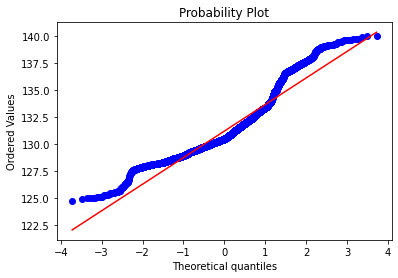

In [49]:
scipy.stats.probplot(df.high,plot=pylab)
pylab.show()

In [50]:
sts.adfuller(df.high)

(-1.9627707135214394,
 0.30313151907374625,
 3,
 6992,
 {'1%': -3.431285598164831,
  '5%': -2.861953459148772,
  '10%': -2.566990080341083},
 -10802.73991859772)

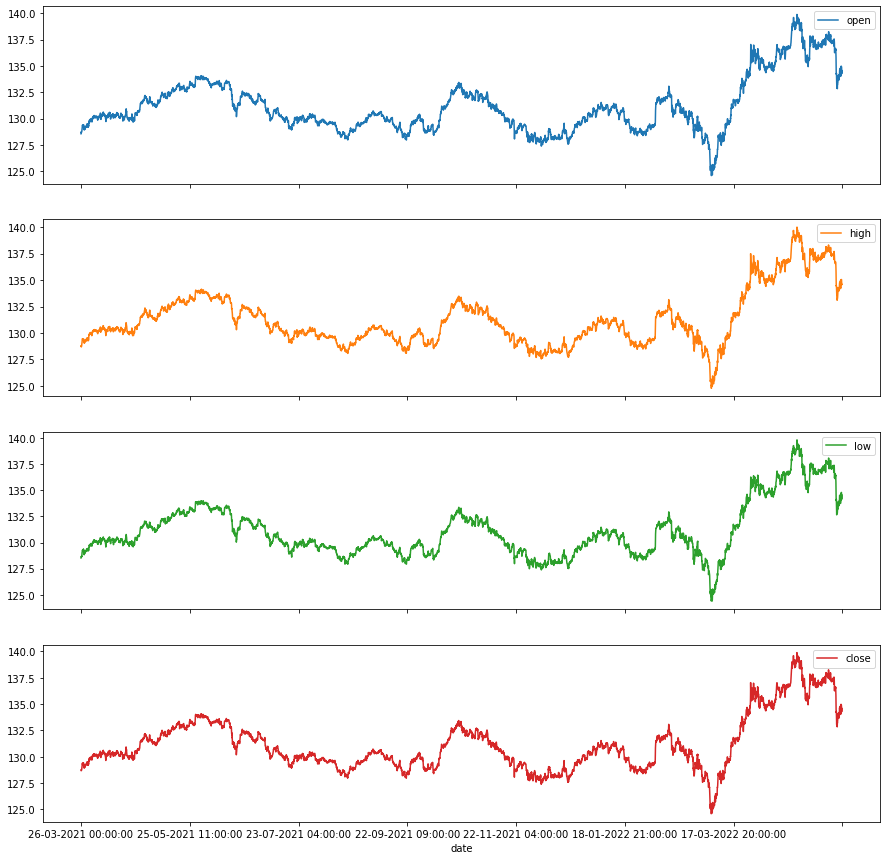

In [51]:
df.plot(figsize=(15,15),subplots=True)

plt.show()

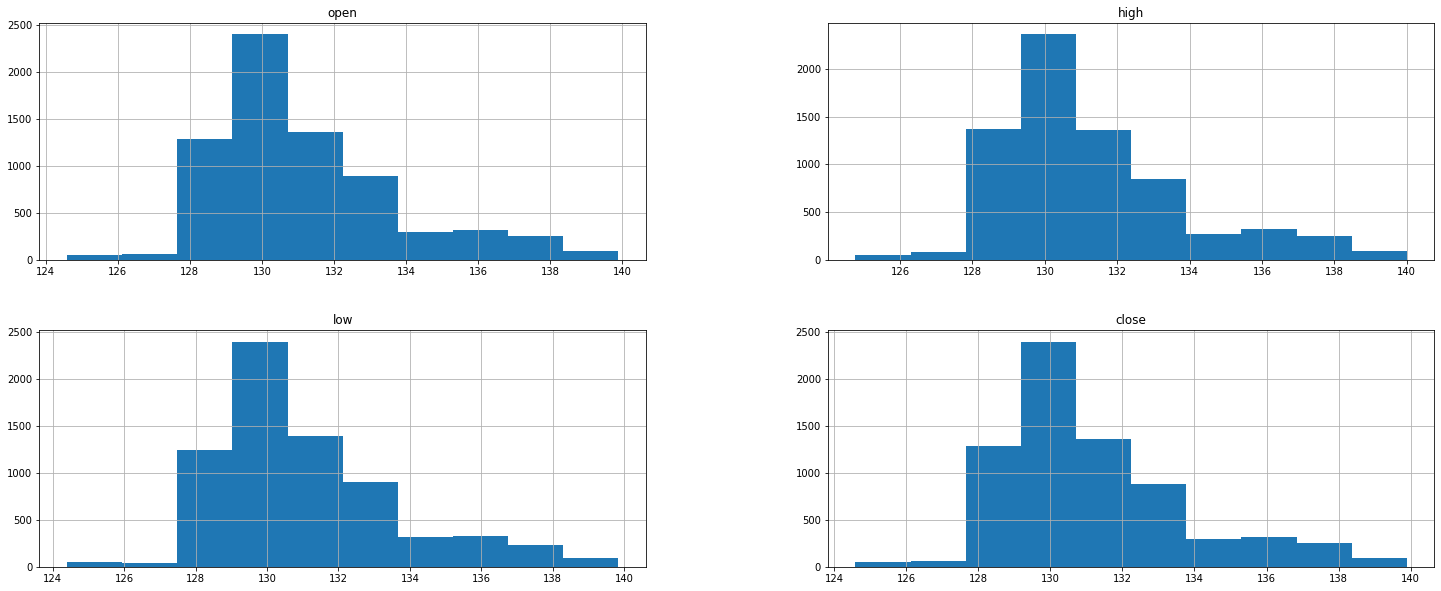

In [52]:
df.hist(figsize=(25,10))

plt.show()

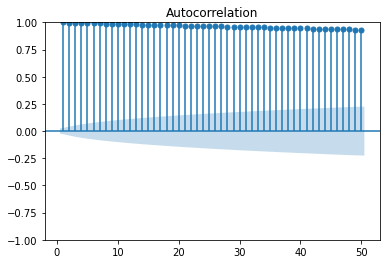

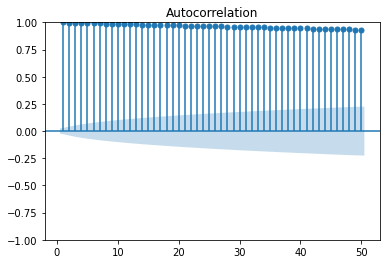

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.high,lags=50,zero=False)


In [57]:
lag=3
train_split = int(len(df)*0.8)
train_split

5596

In [58]:
df=np.array(df)

In [59]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [60]:
n_step = 1
past_history = lag
n_step= 1
STEP = 1

In [61]:
x_train_single, y_train_single = multivariate_data(df, df[:, 0], 0,
                                                   train_split, past_history,
                                                   n_step, STEP,
                                                   single_step=True)
x_test_single, y_test_single = multivariate_data(df, df[:, 0],
                                               train_split, None, past_history,
                                               n_step, STEP,
                                               single_step=True)

In [62]:
print(x_train_single.shape)
print(x_test_single.shape)

(5593, 3, 5)
(1396, 3, 5)


In [63]:
print(y_train_single.shape)
print(y_test_single.shape)

(5593,)
(1396,)


In [64]:
x_train_single[0,:,0:7]

array([['eurjpy', 128.5665, 128.7845, 128.5295, 128.7485],
       ['eurjpy', 128.748, 128.7575, 128.6365, 128.686],
       ['eurjpy', 128.6865, 128.6975, 128.6275, 128.6765]], dtype=object)

#scaling data

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scalers = {}
for i in range(x_train_single.shape[1]):
    scalers [i]= MinMaxScaler(feature_range=(0,1))
    x_train_single[:, i, :] = scalers[i].fit_transform(x_train_single[:, i, :]) 

for i in range(x_test_single.shape[1]):
    x_test_single[:, i, :] = scalers[i].transform(x_test_single[:, i, :]) 

ValueError: ignored